# Project Report

### Goal

The task of the project is to train two agents, using Deep Reinforcement Learning, the agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1. If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01. Thus, the goal of each agent is to keep the ball in play.

The task is episodic, and in order to solve the environment, your agents must get an average score of +0.5 (over 100 consecutive episodes, after taking the maximum over both agents). Specifically,

After each episode, we add up the rewards that each agent received (without discounting), to get a score for each agent. This yields 2 (potentially different) scores. We then take the maximum of these 2 scores.
This yields a single score for each episode.
The environment is considered solved, when the average (over 100 episodes) of those scores is at least +0.5.

### Implementation details

The off-policy approach used to solve this problem is Multiple Agent Deep Deterministic Policy Gradient or MADDPG; which internally makes use of at least two separate Deep Neural Networks, the Actor and the Critic networks.

The implementation is based on N Actor and only 1 Critic, where each Actor controls a racket and is independent of the other Agents. The Critic is shared between the N Actor, and acts as a global critic, this is a major difference with a mono Actor DDPG.

Because the action space is continuous, and we assume the Q-function is differentiable with respect to action, we can perform gradient ascent to update the policy network.


The core algorithm is composed of:

- Randomly sample a batch of states and full states transitions from our replay buffer.

- Update the Q function (Critic network) by one step using gradient descent.

- For each Actor network, update the policy function (Actor network) by one step using gradient ascent, with the observation from our global Critic network



### Neural network architecture


#### Actor network

Layers:

        Input layer: 33 neurons
        Hidden layer 1: 256 neurons
        Activation layer: ReLU
        Batch Normalization layer
        Hidden layer 2: 128 neurons
        Activation layer: ReLU
        Output layer: 2 neurons
        Activation layer: TanH
        
#### Critic network

Layers:

        Input layer: 66 neurons -- Full state size, composed of the state observation of all actors, hence 33 * 2
        Hidden layer 1: 256 neurons
        Activation layer: ReLU
        Batch Normalization layer
        Hidden layer 2: 130 neurons
        Activation layer: ReLU
        Output layer: 1 neurons
        Activation layer: TanH


### Training parameters

Number of episodes: 2000

Replay buffer size: 100,000 

Batch size: 256

Gamma: 0.99

Tau:  0.0003 (Softening factor, used to update the target network weights)

Actor learning rate: 0,0003 

Critic learning rate: 0,0003 

Weight decay: 0

### Training result

The agent was able to reach the target average score of +0.5 at 1600 episodes

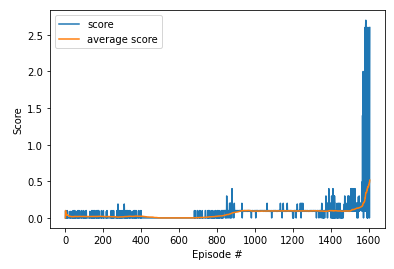

### Thoughts for improvement:

At the moment the algorithm samples experiences randomly from the replay buffer, it would be a good idea to implement Pioritized Experience Replay.

Training takes a long time, due to the fact that the current implementation is able to train on one instance of the running environment, this creates a bottleneck where we are constrained on this single instance. It would be a great idea to implement Asynchronous Advantage Actor-Critic in order to parallize training.

Implement the following algorithms and compare the results

- A3C Asynchronous Advantage Actor-Critic
- ACER Actor Critic with Experience Replay
- GAE Generalized Advantage Estimation
- A2C Advantage Actor-Critic
- PPO - Proximal Policy Optimization